In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar
from matplotlib import rc
from scipy.optimize import fsolve
from scipy.integrate import simpson
from numpy import trapz
from numpy.polynomial.polynomial import polyfit
from scipy import integrate
mpl.rcParams['axes.linewidth'] = 3
import matplotlib as mpl  

plt.rcParams["font.family"] = "Times New Roman"


In [44]:
def charge_gap_contour_plots(Text_dir_doublon,Graph_dir,N,U,dtau,trot):
    
    filename_doublon = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_doublon,N,U[0],dtau,N,U[0],dtau,trot)
    nden,db,db_std = np.loadtxt(filename_doublon,unpack = 'True',usecols = [1,3,4])
        
    dD_dT = np.zeros(len(nden)*(len(U)))      #dkappa_dT.tolist()
    dD_dT_std = np.zeros(len(nden)*(len(U)))  #dkappa_dT_std.tolist()
    U_val = np.zeros(len(nden)*(len(U)))      #T.tolist()
    Nden = np.zeros(len(nden)*(len(U)))      #[float(U[0])*x for x in [1]*len(Trot)]
    n_len = len(nden)

    for k in range(len(U)):
        #print("Trot",Trot[k])
        print("U",U[k])
        start_ind = k*n_len
        end_ind = (k+1)*n_len
        filename_doublon = "%s/Text_files_N_%s_U_%s_dtau_%s/dkappa_dT_data_N_%s_U_%s_dtau_%s_L_%s.dat"%(Text_dir_doublon,N,U[k],dtau,N,U[k],dtau,trot)
        num_den,db,db_std = np.loadtxt(filename_doublon,unpack = 'True',usecols = [1,3,4])
        Nden[start_ind:end_ind] = np.copy(num_den)
        dD_dT[start_ind:end_ind] = np.copy(db)
        dD_dT_std[start_ind:end_ind] = np.copy(db_std) #-0.25*np.power(num_den,2)
        U_val[start_ind:end_ind] = float(U[k])*np.ones(len(nden))

    #print(T_val)
    N_grid = np.linspace(np.nanmin(Nden),np.nanmax(Nden),num = 2*n_len+1)
    U_grid = np.linspace(np.nanmin(U_val),np.nanmax(U_val),num=2*(len(U)-2)+1)
    N_mesh,U_mesh = np.meshgrid(N_grid,U_grid,indexing = 'xy')
    grid_d_c = griddata(np.stack((Nden,U_val),axis=1),dD_dT,(N_mesh,U_mesh),method = 'cubic')
    cm = matplotlib.colormaps.get_cmap('seismic')

    plt.figure(figsize = (25,20))
    ax = plt.gca()
    plt.xticks([1.0,1.1,1.2,1.3,1.4],fontsize = 80)
    plt.yticks(fontsize = 80)
    im = plt.contourf(N_mesh,U_mesh,grid_d_c,np.arange(-0.05, 0.05, .0025),extend='both',cmap = cm)
    plt.xlim(1.0,1.4)
    #plt.ylim(0.5,1.0)
    plt.grid('True',which = 'both')
    CS_2 = ax.contour(N_mesh,U_mesh,grid_d_c, [0.0], colors = ['black'], linestyles = ['dashdot'],linewidths = [5])
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax= cax)
    cbar.ax.tick_params(labelsize = 60)
    plt.tight_layout()
    plt.savefig("%s/dkappa_dT_N_%s_dtau_%s_L_%s.png"%(Graph_dir,N,dtau,trot))

    dat0= CS_2.allsegs[0][0]
    print('x',dat0[:,0])
    print('y',dat0[:,1])

In [45]:
def main():

    N = "10"
    Dtau = "0.05"

    U=["1.0","2.0","3.0","3.50","4.00","4.50","5.0","5.50","6.00","6.50","7.0","8.00","9.0"]
    Mu = ["-0.20","0.00","0.20","0.40","0.60","0.80","1.00","1.20","1.40","1.60","1.80","2.00","2.50","3.00","3.50","4.00","4.50","5.00","5.50","6.00","6.50","7.00",
          "7.50","8.00","8.50","9.00","9.50","10.00"]
    Trot = ["30"] 
    Text_dir_main = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Text_files/Text_files_N_%s_charge_gap'%N

    Graph_dir = '/Users/roy.369/Documents/Cold_atom_correlators/FHM_Legacy_data/FHM_Roy_data/Graphs/Graphs_N_%s/Graphs_N_%s_dtau_%s_charge_gap'%(N,N,Dtau)
    if not os.path.exists(Graph_dir):
        os.makedirs(Graph_dir)

    for k in range(len(Trot)):
        charge_gap_contour_plots(Text_dir_main,Graph_dir,N,U,Dtau,Trot[k])
    



U 1.0
U 2.0
U 3.0
U 3.50
U 4.00
U 4.50
U 5.0
U 5.50
U 6.00
U 6.50
U 7.0
U 8.00
U 9.0
x [0.97660995 0.98139347 1.00025598 1.01911849 1.02814563 1.037981
 1.05242246 1.05684351 1.06216469 1.06639886 1.06462619 1.06394055
 1.06252343 1.05838936 1.05879009 1.0587525  1.05720948 1.05684351
 1.05362816 1.04951315 1.04681331 1.04503918]
y [3.81687292 3.80601487 3.81093802 3.85029121 3.90909091 3.98976572
 4.27272727 4.40826698 4.63636364 5.         5.36363636 5.72727273
 6.09090909 6.45454545 6.81818182 7.18181818 7.54545455 7.60445839
 7.90909091 8.27272727 8.63636364 9.        ]


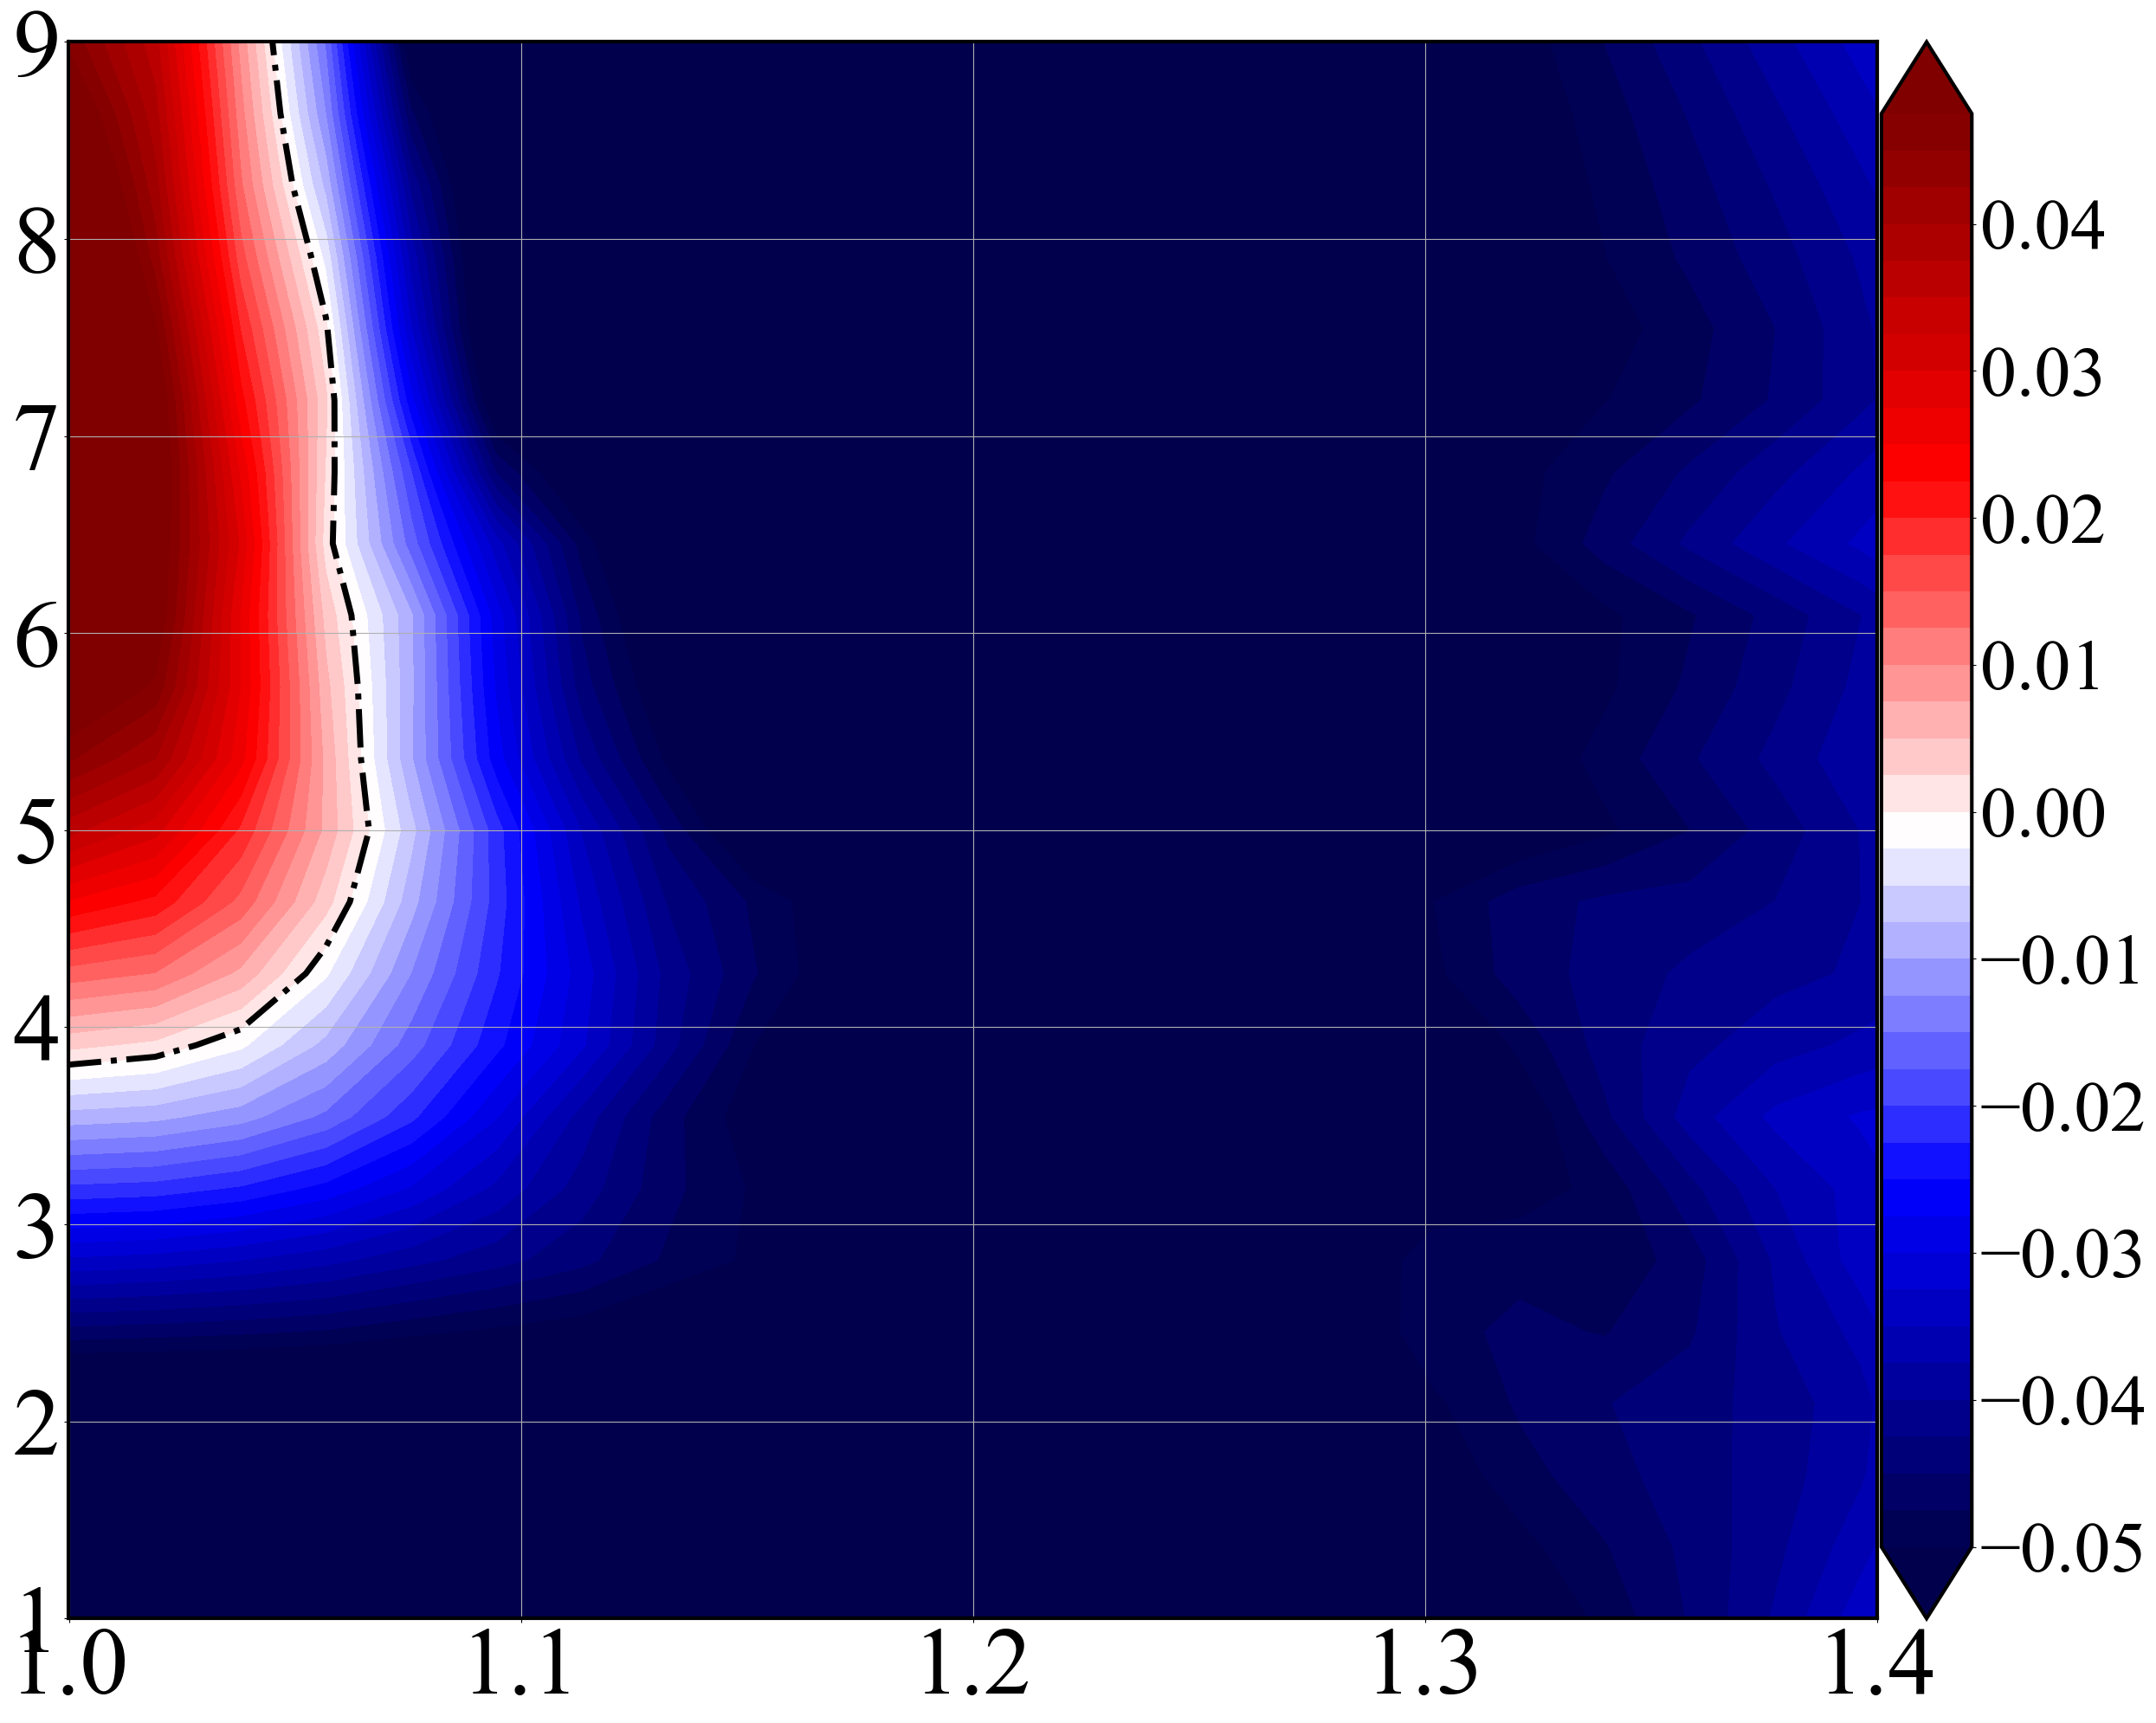

In [46]:
main()